# Grade predictor.
## Using linear Regresssion

* [Numpy](https://numpy.org/) - Used for making arrays

<p>In order to facilitate data analysis and modelling workflows, this code imports a number of libraries and modules for data manipulation, machine learning, and visualisation, including as pandas, numpy, scikit-learn, matplotlib, and pickle, in addition to certain methods from these libraries.</p>

In [50]:
#importing librairies
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot 
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

<p>Using a semicolon as the delimiter, this code reads the "student-mat.csv" CSV file into a pandas DataFrame. It then publishes the DataFrame's first few rows to show its properties.</p>

In [51]:
#using panda to find atrributes 
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())



  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


<p>The first few rows of the filtered DataFrame are printed by this code, which also picks the columns that are present in the DataFrame if they are, or a message is printed in the event that none of the desired columns are discovered.</p>

In [52]:
# Print the columns to check their names
print(data.columns)

# Select columns if they exist
columns_to_select = ["G1", "G2", "G3", "studytime", "failures", "absences"]
existing_columns = [col for col in columns_to_select if col in data.columns]
if not existing_columns:
    print("None of the specified columns exist in the DataFrame.")
else:
    data = data[existing_columns]
    print(data.head())

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


**Attributes and Labels**

Attributes:

Labels:

In [53]:
predict = "G3"
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [54]:
#split into train and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [55]:
linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.8272981336121425


In [56]:
#Save the Model with pickle 

 

with open("studentmodel.pickle", "wb") as f: 

    pickle.dump(linear, f) 

 

# Load the pickle file 

pickle_in = open("studentmodel.pickle", "rb") 

linear = pickle.load(pickle_in) 

 

print('Coefficient: \n', linear.coef_) 

print('Intercept: \n', linear.intercept_) 

 

predictions = linear.predict(x_test) 

 

for x in range(len(predictions)): 

    print(predictions[x], x_test[x], y_test[x])  

Coefficient: 
 [ 0.13249296  0.98063916 -0.21201018 -0.4172809   0.04048062]
Intercept: 
 -1.1842326419697056
5.6174459798480765 [7 6 1 0 5] 7
5.151500982159775 [6 6 2 0 2] 6
11.211112510789404 [12 11  1  1 16] 12
15.302183061108737 [16 15  2  0  2] 15
9.500966036932043 [ 8 10  2  0  6] 10
12.729971654389466 [12 13  2  0  0] 13
14.956235903094187 [14 15  2  0  0] 15
13.802792968433446 [11 12  2  0 54] 11
6.0511789082753005 [6 7 2 0 0] 0
13.781964973349144 [12 14  3  0  7] 14
8.542429076535447 [10  9  2  0  0] 9
3.4673489546565843 [6 5 1 2 0] 0
7.956634282169045 [ 6  9  1  2 14] 8
7.165755050642593 [8 8 3 0 2] 10
14.500421180542826 [15 14  2  1 20] 13
19.27915947675578 [19 19  4  0  4] 20
13.84599181477169 [15 14  4  0  4] 14
6.478087304748972 [8 7 2 0 4] 6
8.411380134772665 [10  9  3  0  2] 8
9.160689467067902 [11  9  2  0 12] 9
11.063108761936128 [13 11  2  0  4] 11
15.727647439567475 [17 15  1  0  4] 16
18.963980369987382 [18 18  1  0  8] 18
15.373537215493768 [16 15  3  0  9] 16
10.

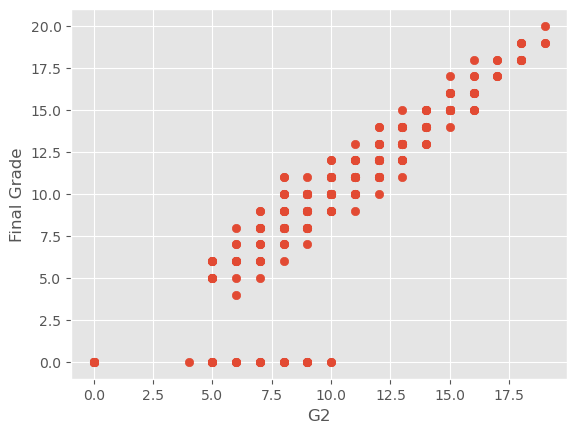

In [57]:
#PLOT THE DATA 

 

style.use("ggplot") 

 

# Set up a scatter plot 

p = "G2" 

pyplot.scatter(data[p], data["G3"]) 

pyplot.xlabel(p) 

pyplot.ylabel("Final Grade") 

pyplot.show() 